# Background 

E-commerce companies like AMazon , flipkart uses different recommendation systems to provide suggestions to the customers.Amazon uses currently item-item collaberrative filtering, which scales to massive datasets and produces high quality recommendation system in the real time. This system is a kind of a information filtering system which seeks to predict the "rating" or preferences which user is interested in. 

![image.png](attachment:image.png)



# Introduction to Recommendation systems

In this modern world we are overloaded with data and this data provides us the useful information. But it's not possible for the user to extract the information which interest them from these data. In order to help the user to find out information about the product , recommedation systems where developed. 

Recommeder system creates a similarity between the user and items and exploits the similarity between user/item to make recommendations.


What recommeder system can solve ?

1. It can help the user to find the right product.
2. It can increase the user engagement. For example, there's 40% more click on the google news due to recommendation.
3. It helps the item providers to deliver the items to the right user.In Amazon , 35 % products get sold due to recommendation.
4. It helps to make the contents more personalized.In Netflix most of the rented movies are from recommendations.


# Types of recommendations

There are mainly 6 types of the recommendations systems :-

1. Popularity based systems :- It works by recommeding items viewed and purchased by most people and are rated high.It is not a personalized recommendation.
2. Classification model based:- It works by understanding the features of the user and applying the classification algorithm to decide whether the user is     interested or not in the prodcut.
3. Content based recommedations:- It is based on the information on the contents of the item rather than on the user opinions.The main idea is if the user likes an item then he or she will like the "other" similar item.
4. Collaberative Filtering:- It is based on assumption that people like things similar to other things they like, and things that are liked by other people with similar taste. it is mainly of two types:
 a) User-User 
 b) Item -Item
 
5. Hybrid Approaches:- This system approach is to combine collaborative filtering, content-based filtering, and other approaches . 
6. Association rule mining :- Association rules capture the relationships between items based on their patterns of co-occurrence across transactions.



# Attribute Information:

● userId : Every user identified with a unique id 

● productId : Every product identified with a unique id 

● Rating : Rating of the corresponding product by the corresponding user 

● timestamp : Time of the rating ( ignore this column for this exercise)



# Import Libraries 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import math
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.externals import joblib
import scipy.sparse
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


# Load the Dataset and Add headers

In [14]:
electronics_data=pd.read_csv("/content/ratings_Electronics (1).csv",names=['UserId', 'ProductId','Rating','Timestamp'])

In [15]:
# Display the data

electronics_data.head()

,UserId,ProductId,Rating,Timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1.365811e+09
1,A2CX7LUOHB2NDG,0321732944,5.0,1.341101e+09
2,A2NWSAGRHCP8N5,0439886341,1.0,1.367194e+09
3,A2WNBOD3WNDNKT,0439886341,3.0,1.374451e+09
4,A1GI0U4ZRJA8WN,0439886341,1.0,1.334707e+09


In [16]:
#Shape of the data
electronics_data.shape

(232142, 4)

In [17]:
#Taking subset of the dataset
electronics_data=electronics_data.iloc[:1048576,0:]

In [18]:
#Check the datatypes
electronics_data.dtypes

UserId        object
ProductId     object
Rating       float64
Timestamp    float64
dtype: object

In [19]:
electronics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232142 entries, 0 to 232141
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   UserId     232142 non-null  object 
 1   ProductId  232141 non-null  object 
 2   Rating     232141 non-null  float64
 3   Timestamp  232141 non-null  float64
dtypes: float64(2), object(2)
memory usage: 7.1+ MB


In [24]:
#Five point summary 

electronics_data.describe()['Rating']

count    232141.000000
mean          4.020604
std           1.371171
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: Rating, dtype: float64

In [25]:
#Find the minimum and maximum ratings
print('Minimum rating is: %d' %(electronics_data.Rating.min()))
print('Maximum rating is: %d' %(electronics_data.Rating.max()))

Minimum rating is: 1
Maximum rating is: 5


The rating of the product range from 0 to 1

## Handling Missing values


In [26]:
#Check for missing values
print('Number of missing values across columns: \n',electronics_data.isnull().sum())

Number of missing values across columns: 
 UserId       0
ProductId    1
Rating       1
Timestamp    1
dtype: int64


## Ratings

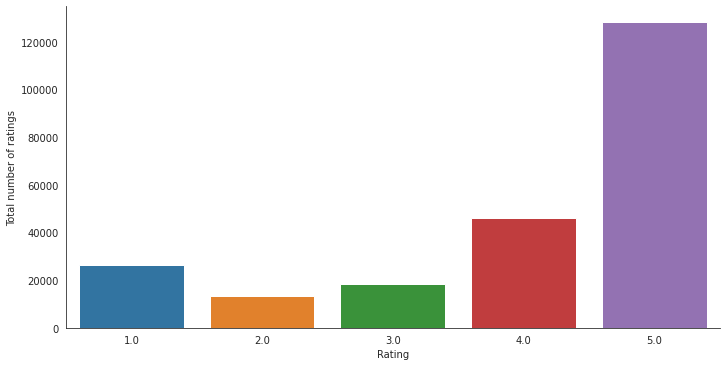

In [27]:
# Check the distribution of the rating
with sns.axes_style('white'):
    g = sns.factorplot("Rating", data=electronics_data, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")

Most of the people has given the rating of 5

## Unique Users and products


In [30]:
print("Total data ")
print("-"*50)
print("\nTotal no of ratings :",electronics_data.shape[0]) # shape[0] - no. of rows and shape[1] - no. of columns
print("Total No of Users   :", len(np.unique(electronics_data.UserId)))
print("Total No of products  :", len(np.unique(electronics_data.ProductId.astype(str)))) # .astype(str) is used to convert from type object to str

Total data 
--------------------------------------------------

Total no of ratings : 232142
Total No of Users   : 199428
Total No of products  : 14636


## Dropping the TimeStamp Column

In [32]:
#Dropping the Timestamp column

electronics_data.drop(['Timestamp'], axis=1,inplace=True)

# Analyzing the rating

In [34]:
#Analysis of rating given by the user 

no_of_rated_products_per_user = electronics_data.groupby(by='UserId')['Rating'].count().sort_values(ascending=False)

no_of_rated_products_per_user.head()

UserId
A231WM2Z2JL0U3    206
A5JLAU2ARJ0BO     110
A25HBO5V8S8SEA     84
AT2J7H5TRZM8Z      57
A2AEZQ3DGBBLPR     55
Name: Rating, dtype: int64

In [35]:
no_of_rated_products_per_user.describe()

count    199428.000000
mean          1.164034
std           0.968169
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         206.000000
Name: Rating, dtype: float64

In [36]:
quantiles = no_of_rated_products_per_user.quantile(np.arange(0,1.01,0.01), interpolation='higher')

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Quantiles and their Values')

Text(0, 0.5, 'No of ratings by user')

Text(0.5, 0, 'Value at the quantile')

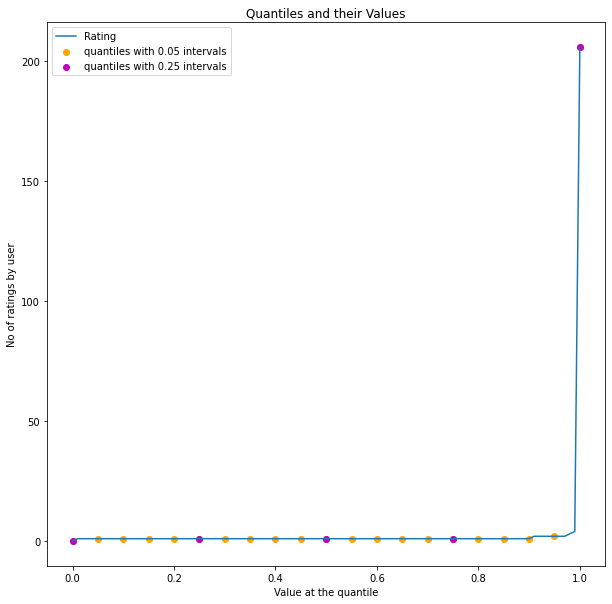

In [37]:
plt.figure(figsize=(10,10))
plt.title("Quantiles and their Values")
quantiles.plot()
# quantiles with 0.05 difference
plt.scatter(x=quantiles.index[::5], y=quantiles.values[::5], c='orange', label="quantiles with 0.05 intervals")
# quantiles with 0.25 difference
plt.scatter(x=quantiles.index[::25], y=quantiles.values[::25], c='m', label = "quantiles with 0.25 intervals")
plt.ylabel('No of ratings by user')
plt.xlabel('Value at the quantile')
plt.legend(loc='best')
plt.show()

In [38]:
print('\n No of rated product more than 50 per user : {}\n'.format(sum(no_of_rated_products_per_user >= 50)) )


 No of rated product more than 50 per user : 8



# Popularity Based Recommendation

Popularity based recommendation system works with the trend. It basically uses the items which are in trend right now. For example, if any product which is usually bought by every new user then there are chances that it may suggest that item to the user who just signed up.

The problems with popularity based recommendation system is that the personalization is not available with this method i.e. even though you know the behaviour of the user you cannot recommend items accordingly.

![image.png](attachment:image.png)

In [40]:
#Getting the new dataframe which contains users who has given 50 or more ratings

new_df=electronics_data.groupby("ProductId").filter(lambda x:x['Rating'].count() >=50)

Text(0.5, 1.0, '# RATINGS per Product')

Text(0.5, 0, 'Product')

Text(0, 0.5, 'No of ratings per product')

[]

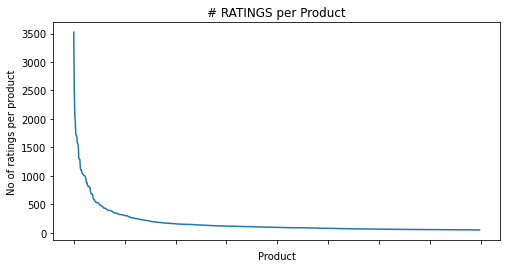

In [41]:
no_of_ratings_per_product = new_df.groupby(by='ProductId')['Rating'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_product.values)
plt.title('# RATINGS per Product')
plt.xlabel('Product')
plt.ylabel('No of ratings per product')
ax.set_xticklabels([])

plt.show()

In [42]:
#Average rating of the product 

new_df.groupby('ProductId')['Rating'].mean().head()

ProductId
0972683275    4.470980
1400501466    3.560000
1400501520    4.243902
1400501776    3.884892
1400532620    3.684211
Name: Rating, dtype: float64

In [44]:
new_df.groupby('ProductId')['Rating'].mean().sort_values(ascending=False).head()

ProductId
B000053HC5    4.945783
B00005LE76    4.879310
B00006I53W    4.859551
B00005UKBD    4.858974
B000053HH5    4.841499
Name: Rating, dtype: float64

In [45]:
#Total no of rating for product

new_df.groupby('ProductId')['Rating'].count().sort_values(ascending=False).head()

ProductId
B00007E7JU    3523
B00004ZCJE    2547
B00001P4ZH    2075
B00007E7C8    1962
B00007EDZG    1735
Name: Rating, dtype: int64

In [46]:
ratings_mean_count = pd.DataFrame(new_df.groupby('ProductId')['Rating'].mean())

In [48]:
ratings_mean_count['rating_counts'] = pd.DataFrame(new_df.groupby('ProductId')['Rating'].count())

In [49]:
ratings_mean_count.head()

,Rating,rating_counts
ProductId,,
0972683275,4.470980,1051
1400501466,3.560000,250
1400501520,4.243902,82
1400501776,3.884892,139
1400532620,3.684211,171


In [50]:
ratings_mean_count['rating_counts'].max()

3523

<Figure size 576x432 with 0 Axes>

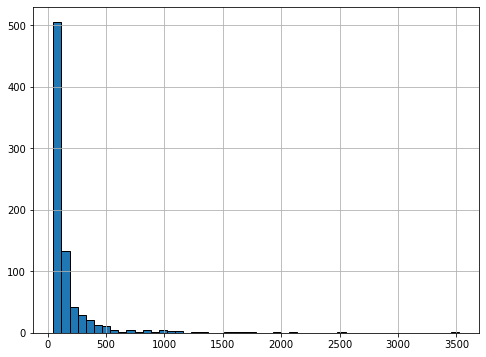

In [51]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=50)

<Figure size 576x432 with 0 Axes>

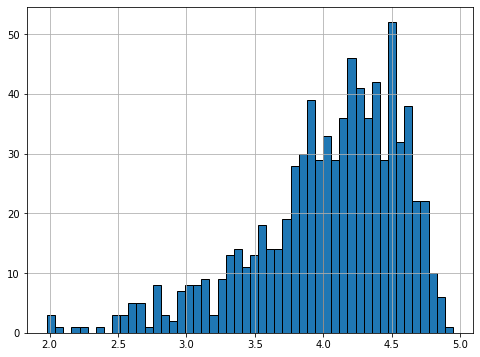

In [52]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['Rating'].hist(bins=50)

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

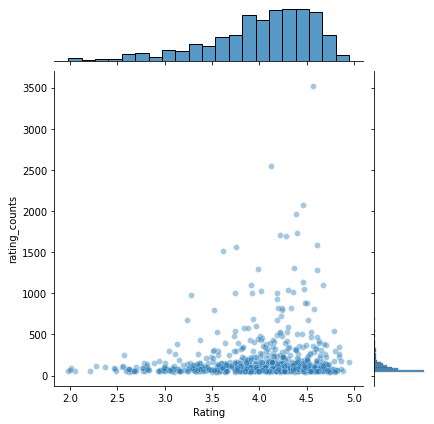

In [53]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='Rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)

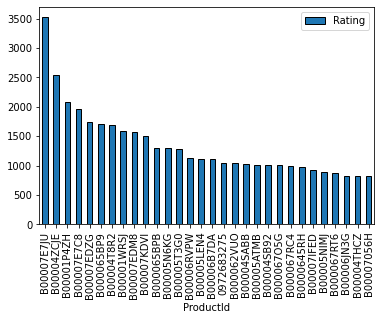

In [55]:
popular_products = pd.DataFrame(new_df.groupby('ProductId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(30).plot(kind = "bar")

# Collaberative filtering (Item-Item recommedation)

Collaborative filtering is commonly used for recommender systems. These techniques aim to fill in the missing entries of a user-item association matrix. We are going to use collaborative filtering (CF) approach.
CF is based on the idea that the best recommendations come from people who have similar tastes. In other words, it uses historical item ratings of like-minded people to predict how someone would rate an item.Collaborative filtering has two sub-categories that are generally called memory based and model-based approaches.



In [57]:
!pip install surprise

     |████████████████████████████████| 11.8MB 306kB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1617623 sha256=b328c86d319610676dcd6bd35f82454df3216bb79c22a62cf358dde22ceb45c9
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [58]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
import os
from surprise.model_selection import train_test_split

In [59]:
#Reading the dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(new_df,reader)

In [60]:
#Splitting the dataset
trainset, testset = train_test_split(data, test_size=0.3,random_state=10)

In [61]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [62]:
# run the trained model against the testset
test_pred = algo.test(testset)

In [63]:
test_pred

[Prediction(uid='A3PV7RB4W10GEH', iid='B00006B9WE', r_ui=5.0, est=4.109775910919142, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A19TXUHTAK8AEB', iid='B00007EDZG', r_ui=5.0, est=4.401477832512315, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A1S43DHDHEL5ZA', iid='B00005ML7Q', r_ui=5.0, est=4.109775910919142, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A139OR7PEGPTCM', iid='B000068O3L', r_ui=5.0, est=4.109775910919142, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='AM71J6TKCEWC9', iid='B00006HYJ5', r_ui=4.0, est=4.109775910919142, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A23AQMACI410EV', iid='B000058E2B', r_ui=5.0, est=4.109775910919142, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='ACWFQW8UD49MA', iid='B000067RC5', r_ui

In [64]:
# get RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

Item-based Model : Test Set
RMSE: 1.3075


1.307547658402279

# Model-based collaborative filtering system

These methods are based on machine learning and data mining techniques. The goal is to train models to be able to make predictions. For example, we could use existing user-item interactions to train a model to predict the top-5 items that a user might like the most. One advantage of these methods is that they are able to recommend a larger number of items to a larger number of users, compared to other methods like memory based approach. They have large coverage, even when working with large sparse matrices.

In [65]:
new_df1=new_df.head(10000)
ratings_matrix = new_df1.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)
ratings_matrix.head()

ProductId,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400532736,1400599997,1400698987,3744295508,6301977173,7214047977,8862935293,9573212919,9575871979,9625993428,9888002198,9966694544,9983891212,9984984354,9985511476,B000001OM4,B000001OM5,B000001OMI,B000001ON6,B00000DM9W,B00000IGBF,B00000J05A,B00000J061,B00000J08Q,B00000J0D2,B00000J0D5,B00000J0D8,B00000J1EJ,B00000J1EP,B00000J1EQ,B00000J1F3,B00000J1GA,B00000J1QK,B00000J1QR,B00000J1SC,B00000J1TX,B00000J1U8,B00000J1UQ,B00000J1V3,B00000J1V5,B00000J3NF,B00000J3Q7,B00000J3UJ,B00000J434,B00000J4EY,B00000J4FS,B00000J4GE,B00000J6WY,B00000JBAT,B00000JBHP,B00000JBPB,B00000JCT8,B00000JCTO,B00000JD34,B00000JDF5,B00000JDF6,B00000JDHV,B00000JFE3,B00000JFIF,B00000JFMK,B00000JHWX,B00000JI4F,B00000JII6,B00000JMUG,B00000JPPI,B00000JSGF,B00000JYLO,B00000JYWQ,B00000K135
UserId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A01852072Z7B68UHLI5UG,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A0266076X6KPZ6CCHGVS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A0293130VTX2ZXA70JQS,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A030530627MK66BD8V4LN,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A0571176384K8RBNKGF8O,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


As expected, the utility matrix obtaned above is sparce, I have filled up the unknown values wth 0.



In [66]:
ratings_matrix.shape

(9832, 76)

Transposing the matrix

In [69]:
X = ratings_matrix.T # .T - is a transpose function
X.head()

UserId,A01852072Z7B68UHLI5UG,A0266076X6KPZ6CCHGVS,A0293130VTX2ZXA70JQS,A030530627MK66BD8V4LN,A0571176384K8RBNKGF8O,A0590501PZ7HOWJKBGQ4,A0641581307AKT5MAOU0Q,A076219533YHEV2LJO988,A0821988FXKFYX53V4QG,A099626739FNCRNHIKBCG,A1003EYWAQFOUG,A100LLXMXDZHJZ,A10121433FMMZNY18RWZ8,A1013OEQCVS6AR,A1013Q8NLCY56R,A101DJDPGK0Q46,A101IWCCIWQWC9,A10285OSAM1MZK,A102IUFPXVDRB6,A102L0RVI4LHH3,A102RLOGIBBDMW,A102ZABPUPNYCT,A1038957GWRBP375RU5T,A103XY7DJYZHFN,A104VHQ06KFLDT,A1058D8UFZL711,A105AZN9C8UAOJ,A105TOJ6LTVMBG,A106YUCY4SVX1D,A1077JEY0CE3BB,A1079KKA0AXSL3,A107I2HYD2JZ5G,A1089S59XSJT2T,A108LYH0NZ9919,A108UXJTIV8XXY,A10956KAP9F1CO,A109ZR833WIFQS,A10BH1JDT6SNGA,A10BOETDPAFJ4C,A10CRW7XRJBJ2G,...,AZKKZ58QBXZUA,AZKOO6TVQBDAF,AZL95QPWJDM3Y,AZM8PD2KBVXN5,AZMCJ61JS6L3X,AZMY6E8B52L2T,AZN6Z0QRMZYX8,AZNMO6T8G0ZEU,AZNVF1G1GJRR4,AZO3DZAJ8S0D9,AZODG8OG0CETL,AZOFJX627J181,AZOPTWUSS6UM0,AZOTUFIYPVNDT,AZPPZOYTNLEN0,AZPT44204EODM,AZPT6K5K0IVCT,AZPYIAOEAV3OZ,AZQ2YSCWSKWX6,AZQ9DYG38GVBR,AZQJQBJ75DHMS,AZQOWHUHXMIMS,AZQQVI9RHJYH6,AZQTJ6HUS5L2Q,AZRPGTU8A7KD5,AZS8W54PXQ01W,AZSUNAT0BRQDU,AZTC7YC8PKG39,AZTC8ZV20NO1D,AZV9WA9MNT0FB,AZWOPBY75SGAM,AZX0ZDVAFMN78,AZX5LAN9JEAFF,AZX7I110AF0W2,AZXKUK895VGSM,AZXP46IB63PU8,AZYTSU42BZ7TP,AZZGJ2KMWB7R,AZZMV5VT9W7Y8,AZZST8OYL5P4Q
ProductId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0972683275,0,0,5,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,5,0,4,0,0,0,5,0,0,0,0,0,...,0,0,0,5,0,0,0,0,0,5,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0
1400501466,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1400501520,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1400501776,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1400532620,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [70]:
X.shape

(76, 9832)

Unique products in subset of data


In [71]:
X1 = X

In [72]:
#Decomposing the Matrix
from sklearn.decomposition import TruncatedSVD

SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(76, 10)

In [73]:
#Correlation Matrix

correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(76, 76)

In [74]:
X.index[75]

'B00000K135'

Index # of product ID purchased by customer



In [76]:
i = "B00000K135"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

75

Correlation for all items with the item purchased by this customer based on items rated by other customers people who bought the same product

In [77]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(76,)

Recommending top 5 highly correlated products in sequence



In [83]:
Recommend = list(X.index[correlation_product_ID > 0.65])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:4]

['1400501520', 'B00000J1U8', 'B00000J3Q7']

Here are the top 10 products to be displayed by the recommendation system to the above customer based on the purchase history of other customers in the website.
